# Naive Bayes
É um algoritmo que tem uma abordagem probabilistica (Teorema de Bayes)

É um algoritmo que pode ser usado em:
- Filtros de spam
- Mineração de emoções em texto
- Classificação de documentos

Primeiro ele verifica as probabilidades de cada uma das combinações. Ao receber novos dados, ele verifica quais são as variáveis e valores para cada uma delas e, a partir do que aprendeu, calcula a probabilidade de fornecer o crédito ou não (exemplo que iremos trabalhar).

Nesse exemplo temos os seguintes novos dados para classificar de um cliente, se iremos fornecer ou não o empréstimo:
- Histórico = Bom
- Dívida = Alta
- Garantia = Nenhuma
- Renda > 35k/ano

Vamos fazer as estimativas de probabilidade para cada uma das classes.
- P(alto) = 6/14 * 1/6 * 4/6 * 6/6 * 1/6 = 0.0079 ---> Esse valor indica o risco de crédito para esse cliente, porém precisamos avaliar as outras características.
- P(moderado) = 3/14 * 1/3 * 1/3 * 2/3 * 1/3 = 0.0052
-P(baixo) = 5/14 * 3/5 * 2/5 * 3/5 * 5/5 = 0.0514

A partir desses valores, podemos observar que o risco de fornecer o crédito para esse cliente é baixo.

Para descobrirmos o que esses valores equivalem em porcentagem de conceder o crédito, precisamos fazer alguns passos adicionais:
- Somar os valores resultantes: 0.0079 + 0.0052 + 0.0514 = 0.0645
- Após obter o resultado da soma, fazemos o cálculo para cada um dos casos para obter a porcentagem:
- P(alto) = 0.0079 / 0.0645 * 100 = 12,24%
- P(moderado) = 0.0052 / 0.0645 * 100 = 8.06%
- P(baixo) = 0.0514 / 0.0645 * 100 = 79.68%

<br>

## Correção Laplaciana
Recebemos os dados para verificação de um novo cliente:
- Histórico = Ruim
- Dívida = Alta
- Garantias = Adequada
- Renda < 15k/ano

- P(alto) = 6/14 * 3/6 * 4/6 * 0 * 3/6 = 0
- P(moderado) = 3/14 * 1/3 * 1/3 * 1/3 * 0 = 0
-P(baixo) = 5/14 * 0 * 2/5 * 2/5 * 0 = 0

Perceba que temos um problema: o resultado dessas probabilidades é zero, fazendo com que não seja possível verificarmos a qual classe o cliente irá perterncer.

É neste tipo de situação que a __correção laplaceana__ entra em jogo.
Ao aplicar essa correção, ela aplicará um registro adicional. Ou seja, onde está com zero, colocarímos o valor 1. Dessa forma, teremos as novas expressões:
- P(alto) = 7/15 * 3/7 * 4/7 * 1/7 * 3/7 = 0
- P(moderado) = 4/15 * 1/4 * 1/4 * 1/4 * 1/4 = 0
-P(baixo) = 6/15 * 1/6 * 2/6 * 2/6 * 1/6 = 0

Após essa correção, seriam realizados os cálculos igual fizemos anteriormente.

<br>

## Mais conceitos
No _Naive Bayes_, usamos as probabilidades __apriori__ - que são os dados que conhecemos previamente - para calcular as probabilidades __posteriori__ - que são os dados que desconhecemos.

__Vantagens e Desvantagens__
 - __Vantagens__: É um algoritmo rápido que não requer muito processamento computacional; possui uma interpretação simples; é capaz de lidar com várias dimensões; faz boas previsões em bases pequenas.
 - __Desvantagens__: Combina características, onde considera as váriaveis independentes, ou seja, cosidera que um atributo não tem relação com o outro.

In [6]:
# Importação das bibliotecas.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.naive_bayes import GaussianNB

plt.style.use('ggplot')

## Base risco de crédito

In [3]:
# Importação dos dados.
with open('credit_processed.pkl', 'rb') as f:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [4]:
X_credit_train.shape, y_credit_train.shape

((24432, 7), (24432,))

In [5]:
X_credit_test.shape, y_credit_test.shape

((8144, 7), (8144,))

In [7]:
# Instancia o modelo
naive_credit_data = GaussianNB()

# Ajusta os dados de treino
naive_credit_data.fit(X_credit_train, y_credit_train)

GaussianNB()

In [8]:
# Previsões nos dados de teste
previsoes = naive_credit_data.predict(X_credit_test)

In [11]:
# Vamos comparar as métricas de desempenho
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
accuracy_score(y_credit_test, previsoes)

0.8226915520628684

In [13]:
confusion_matrix(y_credit_test, previsoes)

array([[5859,  509],
       [ 935,  841]])

In [14]:
from yellowbrick.classifier import ConfusionMatrix

0.8226915520628684

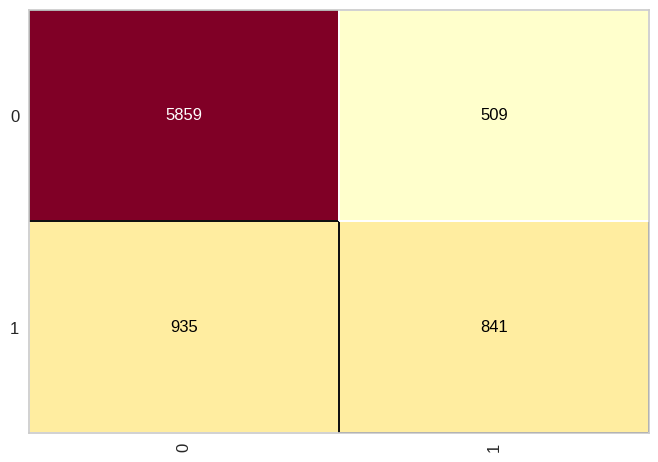

In [15]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

## Base Census

In [16]:
with open('/content/census_processed.pkl', 'rb') as f:
  X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [17]:
X_census_train.shape, y_census_train.shape

((24420, 108), (24420,))

In [18]:
X_census_test.shape, y_census_test.shape

((8141, 108), (8141,))

In [19]:
# Instancia o modelo
naive_census = GaussianNB()

# Ajusta o modelo aos dados de treino
naive_census.fit(X_census_train, y_census_train)

# Realiza as previsoes
previsoes = naive_census.predict(X_census_test)
previsoes

array(['>50K', '>50K', '>50K', ..., '>50K', '>50K', '<=50K'], dtype='<U5')

In [20]:
# Verificar as métricas de desempenho
accuracy_score(y_census_test, previsoes)

0.38742169266674853

0.38742169266674853

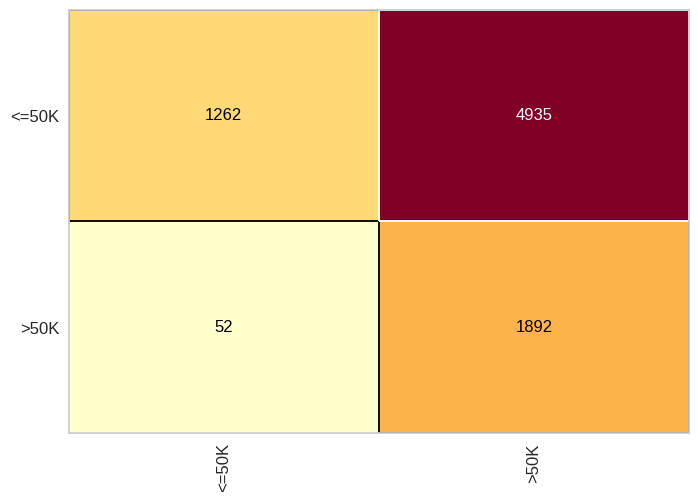

In [21]:
# MAtriz de confusao
cm = ConfusionMatrix(naive_census)

cm.fit(X_census_train, y_census_train)

cm.score(X_census_test, y_census_test)